## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [104]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#read the data 
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [65]:
n_rows =df.shape[0]
print("number of rows : {}".format(n_rows))

number of rows : 294478


c. The number of unique users in the dataset.

In [66]:
n_unique_user=len(df.user_id.unique())
print("number of unique users in the dataset : {}".format(n_unique_user))

number of unique users in the dataset : 290584


d. The proportion of users converted.

In [69]:
print("The proportion of users converted : {}".format(round(df.converted.mean(),5)))

The proportion of users converted : 0.11966


e. The number of times the `new_page` and `treatment` don't line up.

In [122]:
#we are using the query method 
nb_dont_lup = df.query('(group=="treatment" and landing_page!="new_page") or (group!="treatment" and landing_page=="new_page")').shape[0]
print("The number of times the new_page and treatment don't line up : {}".format(nb_dont_lup))

The number of times the new_page and treatment don't line up : 3893


f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


as we can see there is no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [70]:
#we are using the query method 
df2 = df.query('(group=="treatment" and landing_page=="new_page") or (group=="control" and landing_page=="old_page")')

In [71]:
n_rows =df2.shape[0]
print("number of rows : {}".format(n_rows))

number of rows : 290585


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [75]:
n_unique_user=len(df2.user_id.unique())
print("number of unique users in the df2 : {}".format(n_unique_user))

number of unique users in the df2 : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [20]:
#we use the duplicated method to find the user who is repeated in our df2
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [21]:
#print the row
df2[df2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [77]:
#we use the drop method with axis=0 (rows) and we give the index of the user as an argument
df2.drop(axis=0,index=2893,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [78]:
n_rows =df2.shape[0]
print("number of rows : {}".format(n_rows))

number of rows : 290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [80]:
print("The proportion of users converted : {}".format(round(df2.converted.mean(),5)))

The proportion of users converted : 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [27]:
# number of control that convert / total number of control
df2.query('group=="control" and converted==1').shape[0] /  df2.query('group=="control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
# number of treatment that convert / total number of treatment
df2.query('group=="treatment" and converted==1').shape[0]/df2.query('group=="treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [29]:
# number of user that receved new_page as landing page  / total number of user
df2.query('landing_page=="new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**from a probability perspective, we see that the probability of conversion in the control is > then the probability of conversion in the treatment we can say that the old landing page is better than the new landing page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

\begin{equation*}
p_{new} - p_{old} \leq 0 \\  
p_{new} - p_{old} > 0 \\
\end{equation*}

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [93]:
# assume they are equal to the converted rate in ab_data.csv regardless of the page
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [94]:
# assume they are equal to the converted rate in ab_data.csv regardless of the page
p_old =df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [95]:
n_new = df2.query('landing_page=="new_page"').shape[0]
print(n_new)

145310


d. What is $n_{old}$?

In [96]:
n_old = df2.query('landing_page=="old_page"').shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [105]:
# we are using the choise method we the probability p=p_new for having 1  and 1-p_new for having 0, with n_new transactions
new_page_converted=np.random.choice(2, size = n_new, p=[1-p_new,p_new])
p_new = round(new_page_converted.mean(),5)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [106]:
# we are using the choise method we the probability p=p_old for having 1  and 1-p_old for having 0, with n_old transactions
old_page_converted=np.random.choice(2, size = n_old, p=[1-p_old,p_old])
p_old = round(old_page_converted.mean(),5)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [107]:
round(p_new-p_old,5)

7e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [53]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice(2, size = n_new, p=[1-p_new,p_new])
    old_page_converted=np.random.choice(2, size = n_old, p=[1-p_old,p_old])
    p_diffs.append(round(round(new_page_converted.mean(),5)-round(old_page_converted.mean(),5),5))
p_diffs=np.array(p_diffs)    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [55]:
p_diffs.mean()

0.000136654

(array([  33.,  268., 1064., 2338., 2938., 2204.,  882.,  229.,   41.,
           3.]),
 array([-0.00385 , -0.002952, -0.002054, -0.001156, -0.000258,  0.00064 ,
         0.001538,  0.002436,  0.003334,  0.004232,  0.00513 ]),
 <a list of 10 Patch objects>)

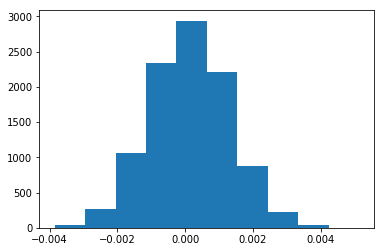

In [54]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
actuel_p_old = df2.query('group=="control" and converted==1').shape[0]/df2.query('group=="control"').shape[0]
actuel_p_new = df2.query('group=="treatment" and converted==1').shape[0]/df2.query('group=="treatment"').shape[0]
(p_diffs > (actuel_p_new-actuel_p_old)).mean()

0.9266

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### answer :
in **j** w've just computed the `p-value` and it is  the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

If the p-value is less than $\alpha$ (Type I error threshold) that we have to fix (in this case it's given with the problem) then we have to reject the null hypotheses and choose the alternative, Otherwise, we fail to reject the null hypothesis.

in this case the $\alpha$ = 0.05 and our p-value > $\alpha$ then we fail to reject the null hypothesis

that's mean that there is no proof that the new landing page help to generate more traffic

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [6]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [9]:
zscore,p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
zscore,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

according to the **z-score** and the **p-value** fonded by the built-in we fail to reject the null hypothesis so the result is similar to what we have found in the part **j.** and **k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logisitic Regression** because the type of target is categorical

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [108]:
df2[['no_ab_page','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,no_ab_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [109]:
df2[['new_landing_page','old_landing_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,no_ab_page,ab_page,new_landing_page,old_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


In [110]:
df2.drop(['no_ab_page','old_landing_page'],axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,new_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0


In [111]:
df2['intercept']=1

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [112]:
model =sm.Logit(df2['converted'],df2[['new_landing_page','intercept']]).fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:15:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
new_landing_page    -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept           -1.9888      0.008   -246.669      0.000      -2.005      -1.973
====================================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

 the null and alternative hypotheses associated with the regression model are

$H_0$ : There is no relationship between X and Y

$H_\alpha$ : There is some relationship between X and Y

X=landing_page

Y=conversion

for this case, we fail to reject the null hypotheses for our regression model

in other words, there is no significant evidence to say that changing the landing page can change(improve) the conversion rate among user so we fail to reject the null hypothesis from part II


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

if we consider other attribut that's mean more information, having more information can imporve our model and decision making process, but this can add more work in terms of (data analysis, testing the relationship between difrent attributs, having outliers, and so on...), so having more data can impove our model but also can make the task of finding the right answer more complexe

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [114]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [115]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,new_landing_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [116]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [117]:
dummy = pd.get_dummies(df_new['country'])
df_new=df_new.join(dummy,how='right')


In [118]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,new_landing_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [119]:
model = sm.Logit(df_new['converted'],df_new[['CA','UK','intercept','ab_page']]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:15:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""


*we see from the p-value of each variable  that even countries do not affect the page conversion*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [120]:
### Fit Your Linear Model And Obtain the Results
df_new['CA_ab_page']=df_new.CA*df_new.ab_page
df_new['UK_ab_page']=df_new.UK*df_new.ab_page

model = sm.Logit(df_new['converted'],df_new[['CA','UK','intercept','ab_page','CA_ab_page','UK_ab_page']]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:15:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [61]:
# to see for how long this experiment has been runing
df_new['timestamp'].max(),df_new['timestamp'].min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

<a id='conclusions'></a>
## Conclusions

even when adding  more information to our model seems not to draw the relationship between the predictor Variables and the conclusion, and that's lead us to different conclusions:
- we see that the experiment has been running for 22 days in January that can lead us to say *have we lunch the experiment at the right time?* that depends on the culture and the target customers (for e-commerce if we run it at the end of the year maybe we will have different results).
- maybe the new landing page is not that good than the old one and that probably makes more sense in our case after all the experiments we have done.

## Resources
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/

https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014. An Introduction to Statistical Learning: with Applications in R. Springer Publishing Company, Incorporated.